In [1]:
import mne
import numpy as np 
import glob
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.decomposition import PCA

In [2]:
import os 
os.chdir('../..')

In [5]:
# Steps 

# 1. read all data 
# 2. read metadata csv 
# 3. match metadata with the data 
# 4. clean data 
# 5. apply pca 

In [8]:
# Read all sheets in your File
df = pd.read_excel(r"/data0/practical-sose23/brain-age/data/clinical_data_updated_2020-08-04.ods", sheet_name=None, engine="odf")
    
# Prints all the sheets name in an ordered dictionary
print(df.keys())

dict_keys(['chronic_pain_patients', 'healthy_controls'])


In [5]:
df_patients = pd.read_excel(r"/data0/practical-sose23/brain-age/data/clinical_data_updated_2020-08-04.ods", header=1, sheet_name='chronic_pain_patients',engine="odf")

In [9]:
df_healthy_control =  pd.read_excel(r"/data0/practical-sose23/brain-age/data/clinical_data_updated_2020-08-04.ods", sheet_name='healthy_controls', engine="odf")

In [11]:
# df_patients.head()
df_healthy_control.head()

,Subject ID,Project prefix,Age (years),Sex (m/f)
0,1,Fibromyalgia,66,f
1,2,Fibromyalgia,36,m
2,3,Fibromyalgia,51,f
3,4,Fibromyalgia,51,f
4,5,Fibromyalgia,25,f


In [123]:
df_healthy_control = df_healthy_control.rename(columns={'Age (years)': 'Age(years)'})
df_healthy_control.head()

,Subject ID,Project prefix,Age(years),Sex (m/f)
0,1,Fibromyalgia,66,f
1,2,Fibromyalgia,36,m
2,3,Fibromyalgia,51,f
3,4,Fibromyalgia,51,f
4,5,Fibromyalgia,25,f


In [126]:
fill_intergs = lambda x:str(x).zfill(3) if type(x) else x
df_healthy_control["Subject ID"] = df_healthy_control["Subject ID"].astype(str).map(fill_intergs)
df_patients["Subject ID"] = df_patients["Subject ID"].astype(str).map(fill_intergs)

In [28]:
# absolute path to search all text files inside a specific folder
paths = [r'data/chronic_pain_patients/chronic_back_pain/preprocessed/*.vhdr', 
         r'data/chronic_pain_patients/fibromyalgia/preprocessed/*.vhdr',
         r'data/chronic_pain_patients/various/preprocessed/*.vhdr', 
         r'data/healthy_controls/preprocessed/*.vhdr']
files_paths_dict = {}
for path in paths: 
    files = glob.glob(path)
    if 'chronic_pain_patients' in path:
        files_paths_dict[path.split('/')[2]] = files 
    else: 
        files_paths_dict[path.split('/')[1]] = files 
        


In [29]:
print(files_paths_dict.keys())
# print(files_paths_dict.values())

dict_keys(['chronic_back_pain', 'fibromyalgia', 'various', 'healthy_controls'])


In [30]:
channel_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz',
 'Pz', 'Oz','FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz', 'FCz']
channel_type_mapping = {}
for channel in channel_names: 
    channel_type_mapping[channel] = 'eeg'

In [31]:
raw_dict = {}
montage = mne.channels.make_standard_montage('standard_1020')
for category, files_paths in files_paths_dict.items(): 
    raw_dict[category] = []
    for path in files_paths: 
        raw = mne.io.read_raw_brainvision(path, preload=True)
        raw.set_channel_types(channel_type_mapping)
        raw.set_montage(montage, on_missing='ignore')
        raw_dict[category].append(raw)


Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp11_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp38_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', '

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp35_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp04_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp27_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp33_eyes_closed.vhdr...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp31_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', '

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp29_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp07_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp41_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp08_eyes_closed.vhdr...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp13_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', '

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp19_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp10_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp36_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp25_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp18_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp12_eyes_closed.vhdr...
Setting channel info structure...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Reading 0 ... 300003  =      0.000 ...   300.003 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp02_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp24_eyes_closed.vhdr...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp26_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', '

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp28_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp39_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp42_eyes_closed.vhdr...


/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp1, Fp2, Fpz, Fz, Iz, LE, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO10, PO3, PO4, PO7, PO8, PO9, POz, Pz, RE, T7, T8, TP10, TP7, TP8, TP9 has changed from NA to V.
  raw.set_channel_types(channel_type_mapping)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoi

Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp21_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp37_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp32_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp14_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp15_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp34_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp16_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp05_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300000  =      0.000 ...   300.000 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp09_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...
Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp30_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/122_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 302539  =      0.000 ...   302.539 secs...
Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/113_rest_preprocessed.vhdr...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Setting channel info structure...
Reading 0 ... 301799  =      0.000 ...   301.799 secs...
Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/115_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 302199  =      0.000 ...   302.199 secs...
Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/103_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 313219  =      0.000 ...   313.219 secs...
Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/108_rest_preprocessed.vhdr...
Setting channel info structure...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', '

Reading 0 ... 311619  =      0.000 ...   311.619 secs...
Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/116_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 302459  =      0.000 ...   302.459 secs...
Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/106_rest_preprocessed.vhdr...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Setting channel info structure...
Reading 0 ... 307039  =      0.000 ...   307.039 secs...
Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/102_rest_preprocessed.vhdr...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', '

Setting channel info structure...
Reading 0 ... 328279  =      0.000 ...   328.279 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', '

Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/114_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 301599  =      0.000 ...   301.599 secs...
Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/121_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 305419  =      0.000 ...   305.419 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', '

Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/117_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 301319  =      0.000 ...   301.319 secs...
Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/109_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 298999  =      0.000 ...   298.999 secs...
Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/112_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 306959  =      0.000 ...   306.959 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', '

Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/104_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 351759  =      0.000 ...   351.759 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/105_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 362499  =      0.000 ...   362.499 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/107_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 344239  =      0.000 ...   344.239 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/119_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 303099  =      0.000 ...   303.099 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/111_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 314439  =      0.000 ...   314.439 secs...


/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp1, Fp2, Fpz, Fz, Iz, LE, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO10, PO3, PO4, PO7, PO8, PO9, POz, Pz, RE, T7, T8, TP10, TP7, TP8, TP9 has changed from NA to V.
  raw.set_channel_types(channel_type_mapping)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoi

Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/110_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 301479  =      0.000 ...   301.479 secs...
Extracting parameters from data/chronic_pain_patients/fibromyalgia/preprocessed/101_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 335279  =      0.000 ...   335.279 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp22_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...
Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp43_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300000  =      0.000 ...   300.000 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp11_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...
Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp38_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp40_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...
Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp01_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp35_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...
Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp04_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp27_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp33_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...
Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp31_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', '

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp29_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp07_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300000  =      0.000 ...   300.000 secs...
Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp41_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp06_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp08_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp45_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp13_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp19_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp10_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp17_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp20_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300005  =      0.000 ...   300.005 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp36_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp25_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp18_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300005  =      0.000 ...   300.005 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp12_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp02_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300000  =      0.000 ...   300.000 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp44_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp24_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp26_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp28_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp39_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp42_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp46_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp21_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp37_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300005  =      0.000 ...   300.005 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp32_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp23_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp14_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp15_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp34_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp16_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp47_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp03_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp05_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300005  =      0.000 ...   300.005 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp09_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp30_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH15_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/012_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 309679  =      0.000 ...   309.679 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH02_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH09_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH33_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH25_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH17_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH29_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH47_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300000  =      0.000 ...   300.000 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/013_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 312119  =      0.000 ...   312.119 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH58_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/019_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 301139  =      0.000 ...   301.139 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH48_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/011_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 304459  =      0.000 ...   304.459 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH06_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH57_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH21_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH01_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH28_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300000  =      0.000 ...   300.000 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/015_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 300259  =      0.000 ...   300.259 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/020_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 300479  =      0.000 ...   300.479 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH61_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH53_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/008_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 317027  =      0.000 ...   317.027 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH69_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300005  =      0.000 ...   300.005 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH23_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH08_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/002_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 336899  =      0.000 ...   336.899 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH68_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH16_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/018_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 305540  =      0.000 ...   305.540 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH19_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH12_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH66_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH42_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH41_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 299999  =      0.000 ...   299.999 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH38_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/022_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 301539  =      0.000 ...   301.539 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH27_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH36_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH32_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/021_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 300439  =      0.000 ...   300.439 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH43_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH62_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/017_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 301339  =      0.000 ...   301.339 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH60_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300005  =      0.000 ...   300.005 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH35_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH30_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/014_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 300919  =      0.000 ...   300.919 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/016_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 302739  =      0.000 ...   302.739 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH49_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH56_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH05_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH11_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/004_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 361959  =      0.000 ...   361.959 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/009_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 314660  =      0.000 ...   314.660 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/010_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 307899  =      0.000 ...   307.899 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH20_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH14_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH18_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH07_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/003_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 320539  =      0.000 ...   320.539 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH03_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH51_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH39_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH10_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH52_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH55_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH34_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH46_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300000  =      0.000 ...   300.000 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH59_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/001_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 360979  =      0.000 ...   360.979 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH45_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300005  =      0.000 ...   300.005 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/006_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 361799  =      0.000 ...   361.799 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH24_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300004  =      0.000 ...   300.004 secs...
Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH54_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH13_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH26_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(path, preload=True)


Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH37_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH04_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300001  =      0.000 ...   300.001 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH44_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH67_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH40_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/005_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 310599  =      0.000 ...   310.599 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH22_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH64_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300003  =      0.000 ...   300.003 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH31_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300000  =      0.000 ...   300.000 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

Extracting parameters from data/healthy_controls/preprocessed/007_rest_preprocessed.vhdr...
Setting channel info structure...
Reading 0 ... 471399  =      0.000 ...   471.399 secs...


/tmp/ipykernel_791843/516624661.py:6: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(path, preload=True)
/tmp/ipykernel_791843/516624661.py:7: RuntimeWarning: The unit for channel(s) AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT10, FT7, FT8, FT9, Fp

In [32]:
raw_dict.keys()

dict_keys(['chronic_back_pain', 'fibromyalgia', 'various', 'healthy_controls'])

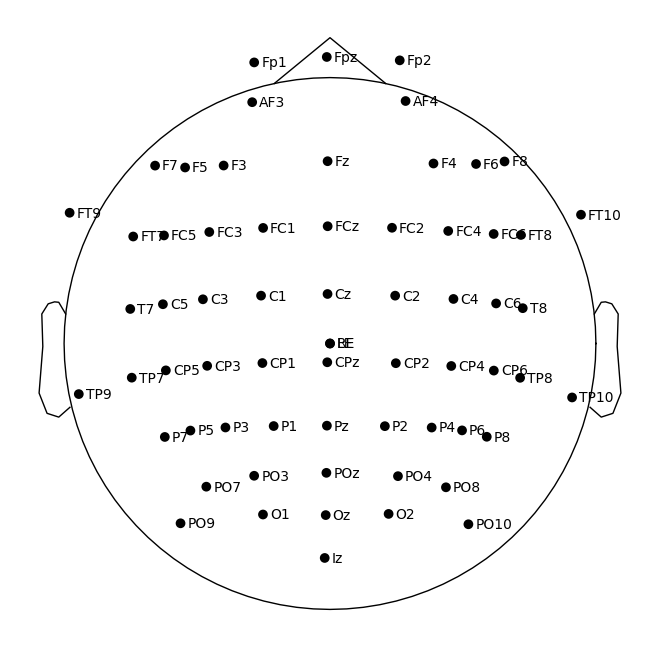

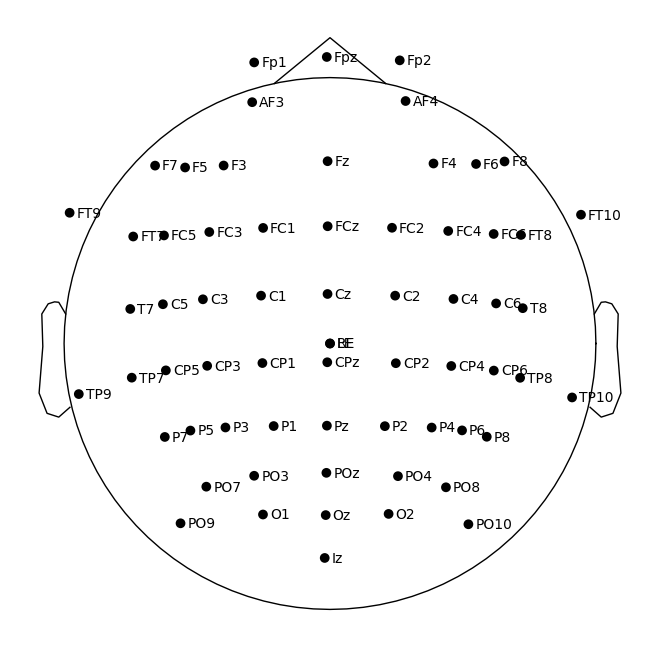

In [17]:
raw_dict['chronic_back_pain'][0].plot_sensors(show_names=True)

Setting 5179 of 300004 (1.73%) samples to NaN, retaining 294825 (98.27%) samples.
Effective window size : 0.256 (s)


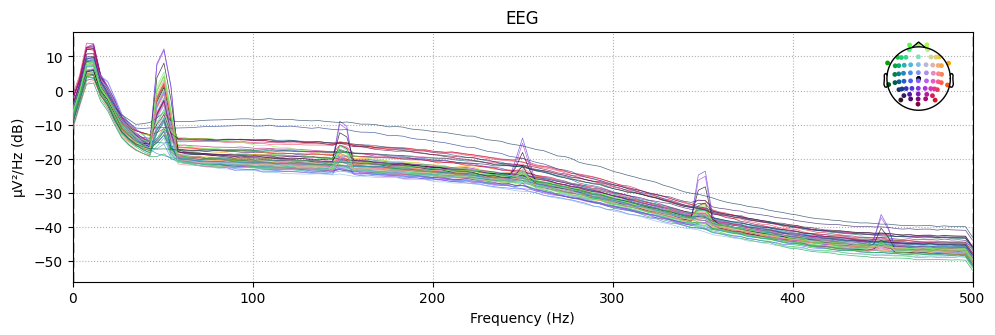

In [38]:
raw_dict['chronic_back_pain'][0].compute_psd().plot()

In [47]:
raw_dict['chronic_back_pain'][0].compute_psd()._data.shape

Setting 5179 of 300004 (1.73%) samples to NaN, retaining 294825 (98.27%) samples.
Effective window size : 0.256 (s)


(65, 129)

In [116]:
id_dict = {}
for category, files_paths in files_paths_dict.items(): 
#     if category == 'healthy_controls': 
#         continue
    id_dict[category] = []
    for path in files_paths: 
        id_ = path.split('/')[-1].split('_')[-3]
#         first_token_in_name = path.split('/')[-1].split('_')[0] 
#         if first_token_in_name.isnumeric(): 
#             id_ = first_token_in_name
#         else: 
#             file_name_list = path.split('/')[-1].split('_')
#             for x in file_name_list: 
#                 if 'vp' in x.lower():
#                     id_ = x 
        id_dict[category].append(id_)

In [118]:
[len(list_id) for k, list_id in id_dict.items()]

[34, 20, 47, 88]

In [124]:
print(id_dict)

{'chronic_back_pain': ['vp11', 'vp38', 'vp35', 'vp04', 'vp27', 'vp33', 'vp31', 'vp29', 'vp07', 'vp41', 'vp08', 'vp13', 'vp19', 'vp10', 'vp36', 'vp25', 'vp18', 'vp12', 'vp02', 'vp24', 'vp26', 'vp28', 'vp39', 'vp42', 'vp21', 'vp37', 'vp32', 'vp14', 'vp15', 'vp34', 'vp16', 'vp05', 'vp09', 'vp30'], 'fibromyalgia': ['122', '113', '115', '103', '108', '116', '106', '102', '114', '121', '117', '109', '112', '104', '105', '107', '119', '111', '110', '101'], 'various': ['vp22', 'vp43', 'vp11', 'vp38', 'vp40', 'vp01', 'vp35', 'vp04', 'vp27', 'vp33', 'vp31', 'vp29', 'vp07', 'vp41', 'vp06', 'vp08', 'vp45', 'vp13', 'vp19', 'vp10', 'vp17', 'vp20', 'vp36', 'vp25', 'vp18', 'vp12', 'vp02', 'vp44', 'vp24', 'vp26', 'vp28', 'vp39', 'vp42', 'vp46', 'vp21', 'vp37', 'vp32', 'vp23', 'vp14', 'vp15', 'vp34', 'vp16', 'vp47', 'vp03', 'vp05', 'vp09', 'vp30'], 'healthy_controls': ['vpH15', '012', 'vpH02', 'vpH09', 'vpH33', 'vpH25', 'vpH17', 'vpH29', 'vpH47', '013', 'vpH58', '019', 'vpH48', '011', 'vpH06', 'vpH57', 

In [36]:
# df_patients['Subject ID'] == 'vp01'
# df_patients['Age(years)'][df_patients['Subject ID']== 'vp01'].values[0]

In [119]:
print(df_healthy_control['Age(years)'].isnull().values.any())
print(df_patients['Age(years)'].isnull().values.any())

False
False


In [128]:
age_dict = {}
for category, ids in id_dict.items(): 
    if category == 'healthy_controls': 
        df = df_healthy_control
    else: 
        df = df_patients
    age_dict[category] = []
    for id_ in ids: 
#         if id_ not in df['Subject ID'].astype(str):
#             print(id_, 'not in dataframe', category)
#         print((df['Subject ID'] == id_).isnull().values.any())
#         age = df.loc[df['Subject ID'] == id_, 'Age(years)']
        age = df[df['Subject ID'] == id_]['Age(years)'].values[0]
        age_dict[category].append(age)


In [129]:
# print(age_dict)

{'chronic_back_pain': [57, 71, 68, 57, 54, 51, 77, 66, 77, 68, 53, 77, 41, 77, 71, 70, 57, 67, 48, 82, 70, 69, 68, 45, 56, 24, 42, 61, 65, 55, 65, 57, 80, 52], 'fibromyalgia': [60, 59, 66, 49, 56, 71, 41, 24, 59, 65, 42, 42, 48, 47, 53, 46, 38, 55, 60, 45], 'various': [72, 18, 57, 71, 86, 59, 68, 57, 54, 51, 77, 66, 77, 68, 77, 53, 60, 77, 41, 77, 56, 69, 71, 70, 57, 67, 48, 80, 82, 70, 69, 68, 45, 60, 56, 24, 42, 57, 61, 65, 55, 65, 57, 73, 57, 80, 52], 'healthy_controls': [73, 38, 73, 71, 47, 73, 79, 77, 60, 40, 66, 58, 50, 31, 71, 55, 65, 72, 74, 35, 62, 70, 75, 44, 53, 61, 67, 36, 55, 71, 62, 53, 70, 56, 44, 52, 42, 48, 52, 41, 53, 42, 48, 79, 41, 67, 48, 39, 49, 47, 41, 79, 72, 77, 51, 52, 59, 69, 72, 37, 70, 51, 66, 44, 54, 76, 49, 27, 40, 39, 54, 66, 43, 57, 73, 77, 76, 67, 78, 71, 74, 54, 40, 25, 55, 79, 65, 48]}


In [52]:
psd_data_dict = {}
for category, list_of_raws in raw_dict.items(): 
    psd_data_dict[category] = []
    for raw in list_of_raws: 
        psd_data_dict[category].append(raw.compute_psd()._data)


Setting 5179 of 300004 (1.73%) samples to NaN, retaining 294825 (98.27%) samples.
Effective window size : 0.256 (s)
Effective window size : 0.256 (s)
Setting 3312 of 300003 (1.10%) samples to NaN, retaining 296691 (98.90%) samples.
Effective window size : 0.256 (s)
Effective window size : 0.256 (s)
Setting 31847 of 300004 (10.62%) samples to NaN, retaining 268157 (89.38%) samples.
Effective window size : 0.256 (s)
Effective window size : 0.256 (s)
Effective window size : 0.256 (s)
Setting 2655 of 300004 (0.88%) samples to NaN, retaining 297349 (99.12%) samples.
Effective window size : 0.256 (s)
Setting 25563 of 300004 (8.52%) samples to NaN, retaining 274441 (91.48%) samples.
Effective window size : 0.256 (s)
Setting 7089 of 300003 (2.36%) samples to NaN, retaining 292914 (97.64%) samples.
Effective window size : 0.256 (s)
Setting 11651 of 300004 (3.88%) samples to NaN, retaining 288353 (96.12%) samples.
Effective window size : 0.256 (s)
Setting 8806 of 300003 (2.94%) samples to NaN, r

Effective window size : 0.256 (s)
Effective window size : 0.256 (s)
Setting 5166 of 300002 (1.72%) samples to NaN, retaining 294836 (98.28%) samples.
Effective window size : 0.256 (s)
Setting 4198 of 300005 (1.40%) samples to NaN, retaining 295807 (98.60%) samples.
Effective window size : 0.256 (s)
Effective window size : 0.256 (s)
Setting 4945 of 300006 (1.65%) samples to NaN, retaining 295061 (98.35%) samples.
Effective window size : 0.256 (s)
Setting 10042 of 300003 (3.35%) samples to NaN, retaining 289961 (96.65%) samples.
Effective window size : 0.256 (s)
Effective window size : 0.256 (s)
Setting 500 of 300005 (0.17%) samples to NaN, retaining 299505 (99.83%) samples.
Effective window size : 0.256 (s)
Setting 2187 of 309680 (0.71%) samples to NaN, retaining 307493 (99.29%) samples.
Effective window size : 0.256 (s)
Setting 5924 of 300004 (1.97%) samples to NaN, retaining 294080 (98.03%) samples.
Effective window size : 0.256 (s)
Setting 500 of 300004 (0.17%) samples to NaN, retain

Effective window size : 0.256 (s)
Setting 15348 of 471400 (3.26%) samples to NaN, retaining 456052 (96.74%) samples.
Effective window size : 0.256 (s)


In [206]:
psd_data_concatenated = np.concatenate([psd_data_dict['chronic_back_pain'], 
                                   psd_data_dict['fibromyalgia'], 
                                   psd_data_dict['various'], 
                                   psd_data_dict['healthy_controls']])

age_concatenated = np.concatenate([age_dict['chronic_back_pain'], 
                                   age_dict['fibromyalgia'], 
                                   age_dict['various'], 
                                   age_dict['healthy_controls']])

labels = np.concatenate([['chronic_back_pain'] * len(age_dict['chronic_back_pain']), 
                        ['fibromyalgia'] * len(age_dict['fibromyalgia']), 
                        ['various'] * len(age_dict['various']), 
                        ['healthy_controls'] * len(age_dict['healthy_controls'])])

labeled_colors = np.concatenate([['red'] * len(age_dict['chronic_back_pain']), 
                        ['blue'] * len(age_dict['fibromyalgia']), 
                        ['green'] * len(age_dict['various']), 
                        ['orange'] * len(age_dict['healthy_controls'])])
print(psd_data_concatenated.shape)
print(age_concatenated.shape)
print(labels.shape)



(189, 65, 129)
(189,)
(189,)


In [133]:
# data = np.array(data_dict['chronic_back_pain'])

pca_data = {}
pca = PCA(n_components=2)
pca_data = pca.fit_transform(psd_data_concatenated.reshape((189, -1)))
pca_data.shape

(189, 2)

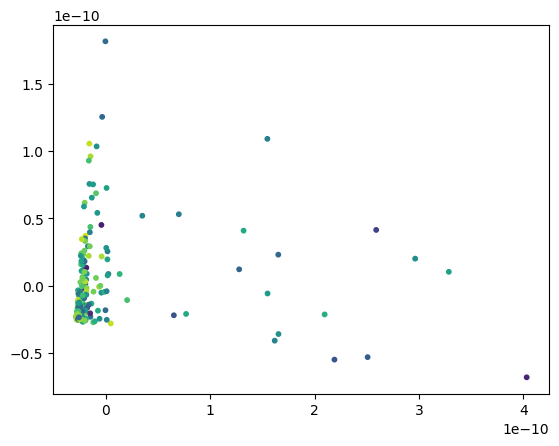

In [147]:
# # plt.xticks(np.arange(0, 1, 0.1))
# plt.scatter(pca_data[:,0], pca_data[:,1], s=10, c=age_concatenated)
# # plt.legend(loc='lower right')
# plt.show()

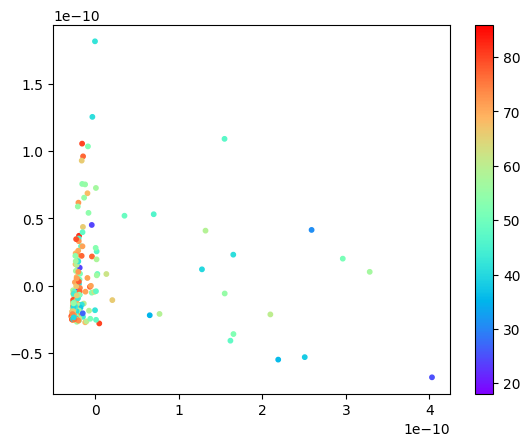

In [185]:
import matplotlib.cm as cm
# colors = cm.rainbow(np.linspace(0, 1, len(age_concatenated)))
sc = plt.scatter(pca_data[:,0], pca_data[:,1], s=10, vmin=min(age_concatenated), vmax=max(age_concatenated), c=age_concatenated, cmap='rainbow')
cbar = plt.colorbar(sc)
plt.show()

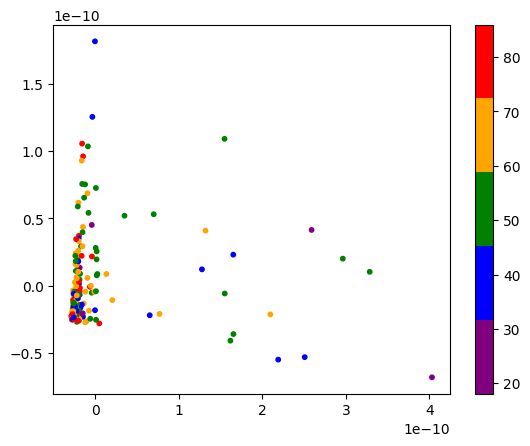

In [198]:
import matplotlib.colors as colors
colors_list = ['purple', 'blue', 'green', 'orange', 'red']
cmap = colors.ListedColormap(colors_list)
sc = plt.scatter(pca_data[:,0], pca_data[:,1], s=10, vmin=min(age_concatenated), vmax=max(age_concatenated), c=age_concatenated, cmap=cmap)
cbar = plt.colorbar(sc)

plt.show()


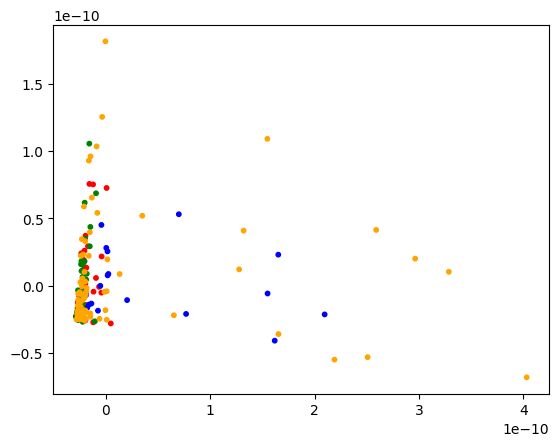

In [209]:
sc = plt.scatter(pca_data[:,0], pca_data[:,1], s=10, c=labeled_colors)
# cbar = plt.colorbar(sc)
plt.show()

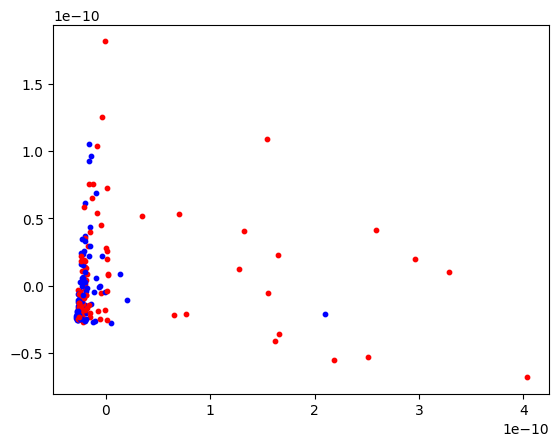

In [187]:
count = 0 
for i, data in enumerate(pca_data):  
    age = age_concatenated[i]
    count +=1
    if age < 60: 
        plt.scatter(data[0], data[1], s=10, c='r', label='<60')
    else: 
        plt.scatter(data[0], data[1], s=10, c='b', label='>60')

# plt.legend(loc='lower right')
plt.show()
            

In [69]:
data_concatenated = np.concatenate([data_dict['chronic_back_pain'], 
                                   data_dict['fibromyalgia'], 
                                   data_dict['various'], 
                                   data_dict['healthy_controls']])
print(data_concatenated.shape)


(189, 65, 290000)


In [70]:
data_concatenated = data_concatenated.reshape(data_concatenated.shape[0], -1)

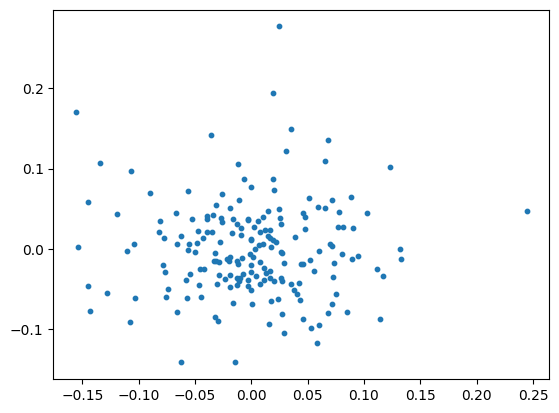

In [71]:
pca = PCA(n_components=2)
all_data_reduced = pca.fit_transform(data_concatenated)
plt.scatter(all_data_reduced[:,0], all_data_reduced[:,1], s=10)
plt.show()

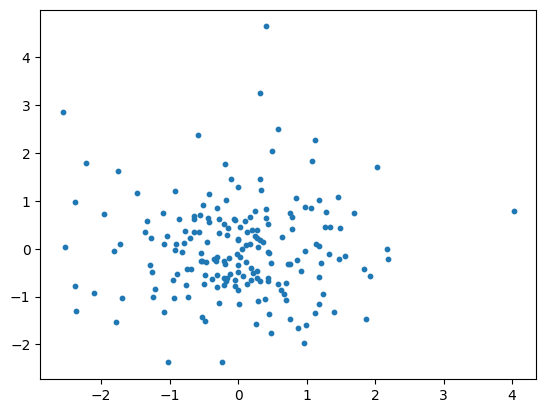

In [72]:
pca = PCA(n_components=2, whiten=True)
all_data_reduced = pca.fit_transform(data_concatenated)
plt.scatter(all_data_reduced[:,0], all_data_reduced[:,1], s=10)
plt.show()